# Digits Classification using Convolutional Neural Network

## Model and Backend
I use Keras the model and TensorFlow2 as backend

## Dataset
I'm using MNIST as the dataset. This dataset contains 70000 images of digits written by hand by different people


## 1. Keras Implementation <a id="1"></a>
### 1.1 Libraries <a id="1.1"></a>

In [25]:
import numpy as np
np.random.seed(2)
import matplotlib.pyplot as plt

In [26]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.optimizer_v2.gradient_descent import SGD

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [28]:
x_train = x_train/255.0
x_test = x_test/255.0

In [29]:
rows = 10
y_train = np_utils.to_categorical(y_train, rows)
y_test = np_utils.to_categorical(y_test, rows)

Text(0.5, 1.0, 'Example - Category: 4')

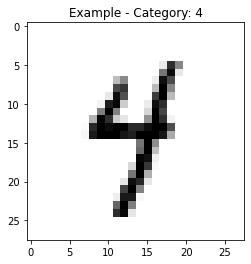

In [30]:
numImages = 7489
plt.imshow(x_train[numImages,:].reshape(28,28), cmap='gray_r')
plt.title("Example - Category: " + str(np.argmax(y_train[numImages])))

In [31]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [32]:
model = Sequential()
#CONV1 and MAX-POOLING1
model.add(Conv2D(filters=6, kernel_size=(5,5), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
#CONV2 and MAX-POOLING2
model.add(Conv2D(filters=16, kernel_size=(5,5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#Flattering, FC1, FC2 and exit
model.add(Flatten())
model.add(Dense(120, activation="relu"))
model.add(Dense(84, activation="relu"))
model.add(Dense(rows, activation='softmax'))

In [33]:
sgd = SGD(learning_rate=0.1)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [34]:
tam_lote = 128
model.fit(x_train, y_train, epochs=rows, batch_size=tam_lote, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.7811 - accuracy: 0.7436 - val_loss: 0.1145 - val_accuracy: 0.9663
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1106 - accuracy: 0.9664 - val_loss: 0.0688 - val_accuracy: 0.9777
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0734 - accuracy: 0.9766 - val_loss: 0.0921 - val_accuracy: 0.9704
Epoch 4/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0580 - accuracy: 0.9824 - val_loss: 0.0587 - val_accuracy: 0.9805
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0525 - accuracy: 0.9841 - val_loss: 0.0567 - val_accuracy: 0.9810
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0392 - accuracy: 0.9876 - val_loss: 0.0443 - val_accuracy: 0.9860
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0352 - accuracy: 0.9888 - val_loss: 0.0400 - val_accuracy: 0.9862
Epoch 

D:\Programming\Lenguajes\Python\Python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


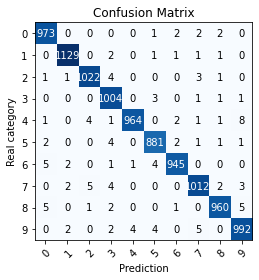

In [35]:
from sklearn.metrics import confusion_matrix

def confusionMatrix(y_ref, y_pred, clases, cmap=plt.cm.Blues):

    titulo = 'Confusion Matrix'

    cm = confusion_matrix(y_ref, y_pred)

    # Generar figura
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=clases, yticklabels=clases,
           title=titulo,
           ylabel='Real category',
           xlabel='Prediction')

    # Rotar y alinear ticks
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Rellenar gráfica con los valores de la matriz de confusión
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    
    
    
    

y_pred = model.predict_classes(x_test)
y_ref = np.argmax(y_test,axis=1)
etiquetas = ['0','1','2','3','4','5','6','7','8','9']
confusionMatrix(y_ref, y_pred, etiquetas)